# Phần 1 — Decision Tree Classification (Iris)

**Bối cảnh thực tế:** Phân loại các loài hoa *Iris* dựa trên 4 đặc trưng hình thái (sepal length/width, petal length/width).  
**Ứng dụng thực tế:** Hệ thống phân loại mẫu sinh học, hỗ trợ nhà vườn/nhà sinh học phân loại nhanh theo thuộc tính đo đạc.

## 1.1) Nạp dữ liệu, tách train/test

In [9]:
# !pip install -U scikit-learn pandas numpy matplotlib
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Tải dữ liệu Iris
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
class_names = iris.target_names

# Tách train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((120, 4), (30, 4))

## 1.2) Huấn luyện Decision Tree & đánh giá

Độ chính xác (accuracy) trên tập test: 0.9667

Báo cáo phân loại:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



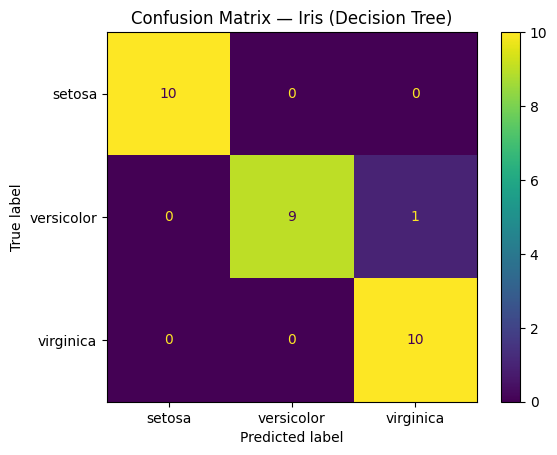

In [11]:
# Huấn luyện cây quyết định
clf = DecisionTreeClassifier(
    criterion="gini",       # hoặc "entropy" (information gain)
    max_depth=3,            # giới hạn độ sâu để dễ nhìn
    random_state=42
)
clf.fit(X_train, y_train)

# Dự đoán & đánh giá
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Độ chính xác (accuracy) trên tập test: {acc:.4f}\n")

print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Ma trận nhầm lẫn
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names)
plt.title("Confusion Matrix — Iris (Decision Tree)")
plt.show()

## 1.3) Trực quan cấu trúc cây

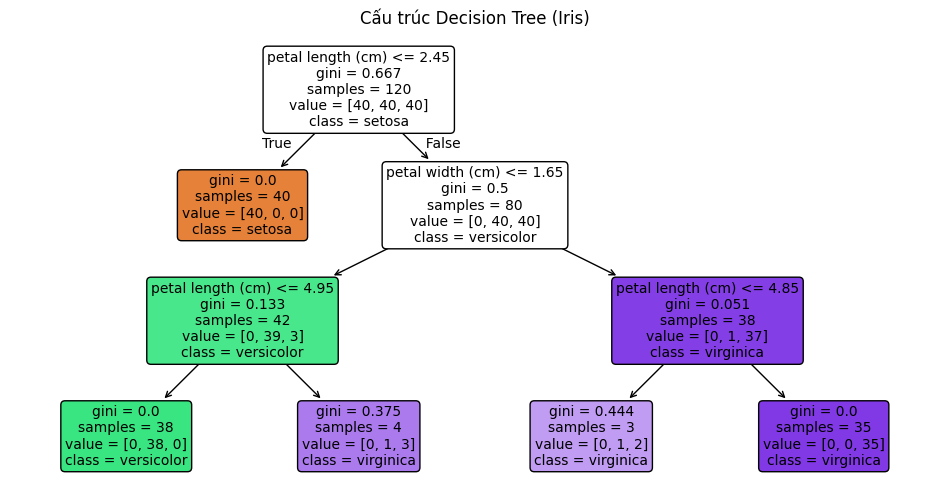

In [12]:
plt.figure(figsize=(12,6))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Cấu trúc Decision Tree (Iris)")
plt.show()

## 1.4) Thử dự đoán 1 mẫu mới (ví dụ ứng dụng)
Giả sử chúng ta đo được thông số của một bông hoa mới, hãy dự đoán nó thuộc loài nào.

In [16]:
# Ví dụ 1 mẫu mới (sepal length, sepal width, petal length, petal width)
new_sample = [[5.1, 3.5, 1.4, 0.2]]
pred_class_idx = clf.predict(new_sample)[0]
print("Dự đoán loài:", class_names[pred_class_idx])

Dự đoán loài: setosa
